In [2]:
import numpy as np

## Bias Variance Tradoff

![title](image3.png)

## Cross Validation

In [3]:
k = 5
data = np.random.uniform(size=1500)
y = np.random.uniform(size=1500)

In [4]:
folds = [data[i::5] for i in range(5)]
folds_y = [y[i::5] for i in range(5)]

In [5]:
for d in range(10):
    loss = 0
    for i in range(5):
        x = list(range(5))
        x.remove(i)
        train = np.array([folds[j] for j in x]).flatten()
        test = np.array(folds[i])
        test = [[t**k for k in range(d+1)] for t in test]

        train_y = np.array([folds_y[j] for j in x]).flatten()
        test_y = np.array(folds_y[i])

        param = np.polyfit(train, train_y, deg=d)
        predicted = [np.array(t).dot(np.array(param[::-1])) for t in test]
        loss += sum([(predicted[index] - test_y[index])**2 for index in range(len(predicted))])/len(predicted)
    print("mean loss", loss*1000)

mean loss 429.47012823046964
mean loss 429.9713071155119
mean loss 431.0443120439024
mean loss 431.2071611869455
mean loss 431.77870177471226
mean loss 432.2579937512372
mean loss 432.8277134161527
mean loss 433.5220875769822
mean loss 433.4356532794886
mean loss 433.63111964203256


## Regularized Regression

In [19]:


import pandas as pd
from numpy import linalg
from pandas import *

def RegularisedRegression(x,y,L):
    x=np.matrix(x)
    y=np.matrix(y).transpose()
    XTX = x.transpose()*x
    XTY = x.transpose()*y
    LI = L*np.matrix(np.identity(len(XTX)))
    LI[0,0]=0
    beta = linalg.inv(XTX-LI)*XTY
    y_hat = np.dot(x,beta)
    residuals = y_hat - y
    SSE = residuals.transpose()*residuals
    MSE = SSE/len(X)
    print ("the parameter estimates are:")
    print (beta)
    print ("the mean squared error is:" , MSE)

In [22]:
from sklearn import datasets, preprocessing

diabetes = datasets.load_diabetes()
print (diabetes.data.shape, diabetes.target.shape)
X = diabetes.data
y = diabetes.target
intercept = np.ones(len(X))
X = np.append(intercept, X)
X = np.reshape(X,(442,11))

(442, 10) (442,)


In [24]:
from scipy import stats
Z = stats.zscore(X, axis=0)
Y = stats.zscore(y)

In [25]:
RidgeAnalytical(Z,Y,.1)

the parameter estimates are:
[[ 0.05696372]
 [-0.0960474 ]
 [-0.12554397]
 [ 0.24121324]
 [-0.07822764]
 [ 0.37552932]
 [-0.10470504]
 [ 0.25816443]
 [-0.40455371]
 [-0.28117194]
 [ 0.14147782]]
the mean squared error is: [[0.98895015]]


In [34]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.1, fit_intercept=True)
clf.fit(Z,Y)
print (clf.coef_)

[ 0.05542193 -0.09434325 -0.12226245  0.23451536 -0.07528716  0.36776402
 -0.10115816  0.25178491 -0.39594385 -0.27345596  0.13606568]


## Linear Regression

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
  
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
  
# Use only one feature
x = diabetes.data[:, np.newaxis]
x_temp = x[:, :, 2]
y = diabetes.target
  
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x_temp, y)
  
# Create linear regression object
model = linear_model.LinearRegression()
  
# Train the model using the training sets
model.fit(x_train, y_train)
  
# The coefficients
model.coef_                       # array([ 938.23786125])
  
# The mean square error
np.mean((model.predict(x_test) - y_test) ** 2) # 4017.22
  
# Explained variance score: 1 is perfect prediction
model.score(x_test, y_test)       # 0.31
  
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, model.predict(x_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Cross Validation

In [36]:
from sklearn.cross_validation import cross_val_score
 
...
 
scores = cross_val_score(model, x_temp, diabetes.target)
scores        # array([0.2861453, 0.39028236, 0.33343477])
scores.mean()

0.336620809987693

## Polynomial Regression

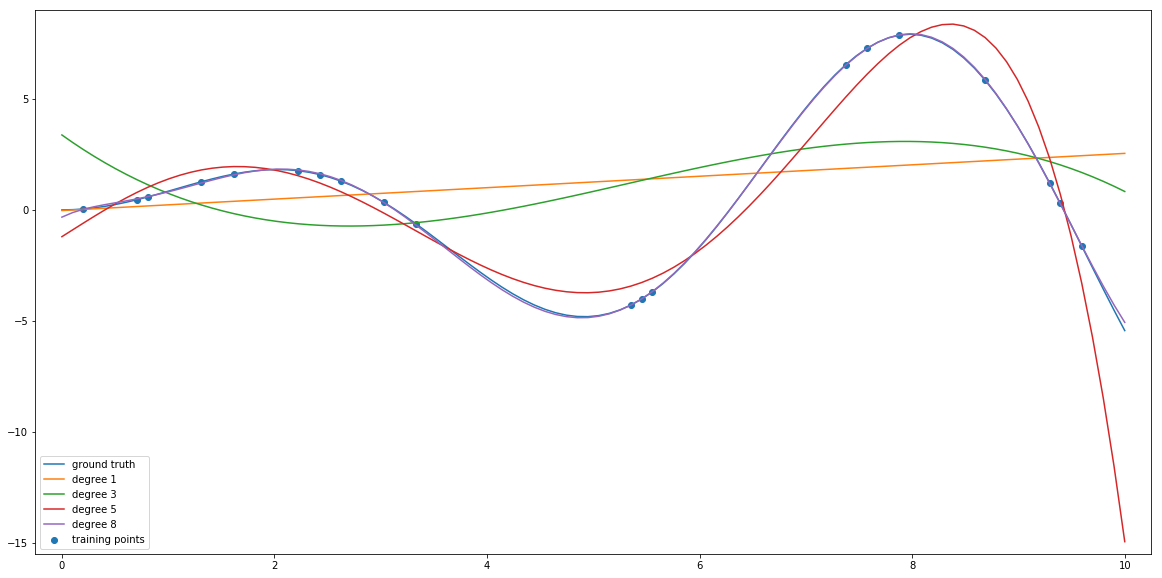

In [38]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
 
# Function to approximate by polynomial interpolation
def f(x): return x * np.sin(x)
 
# Generate points used to plot
x_plot = np.linspace(0, 10, 100)
 
# Generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)
 
# Create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
 
plt.figure(figsize=(20,10))
plt.plot(x_plot, f(x_plot), label="ground truth")
plt.scatter(x, y, label="training points")
 
for degree in [1, 3, 5, 8]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)
 
plt.xlim([-0.25,10.25])
plt.ylim([-15.5,9])
plt.legend(loc='lower left')
 
plt.show()

## Regularisation

In [40]:
from sklearn.linear_model import Lasso, Ridge
 
...
 
for degree in [1, 3, 5, 8]:
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha = 0.1))

In [42]:
from sklearn.linear_model import Lasso, Ridge
 
...
 
for degree in [1, 3, 5, 8]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = 0.1))

chosen alpha 2
chosen alpha 265


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


chosen alpha 16
chosen alpha 4783


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


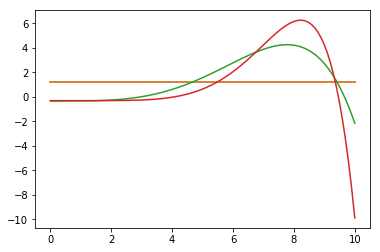

In [44]:
from sklearn.linear_model import LassoCV
 
...
 
for degree in [1, 3, 5, 8]:
    poly = PolynomialFeatures(degree)
    X_ = poly.fit_transform(X)
    X_plot_ = poly.fit_transform(X_plot)
     
    model = LassoCV(cv=20)
    model.fit(X_, y)
    print ("chosen alpha %d" % model.alpha_)
    y_plot = model.predict(X_plot_)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)